In [130]:
import pandas as pd
import numpy as np

In [131]:
Datosagr=["Mi proyecto\Data\Broad.csv","Mi proyecto\Data\Frase.csv","Mi proyecto\Data\Kindle.csv","Mi proyecto\Data\Phase.csv"]


In [132]:
Muestra=[]
for archivos in Datosagr:
 df=pd.read_csv(archivos, sep=";")
 Muestra.append(df)



In [133]:
#test

In [134]:
datos_raw = pd.concat(Muestra, ignore_index=True)
datos_raw

Estado CAMPAIGN          Palabra clave Tipo de coincidencia  \
0      PAUSED    BROAD       victoria alvarez                BROAD   
1      PAUSED    BROAD  trono de cristal saga                BROAD   
2      PAUSED    BROAD       trono de cristal                BROAD   
3      PAUSED    BROAD   top libros juveniles                BROAD   
4      PAUSED    BROAD    tolkien aniversario                EXACT   
...       ...      ...                    ...                  ...   
3425  ENABLED    PHASE   archivo de tormentas               PHRASE   
3426  ENABLED    PHASE          amazon libros               PHRASE   
3427  ENABLED    PHASE         14 años libros               PHRASE   
3428  ENABLED    PHASE                12 años               PHRASE   
3429   PAUSED    PHASE         10 años libros               PHRASE   

                     Estado.1  Puja recomendada (bajo)(EUR)  \
0     TARGETING_CLAUSE_PAUSED                          0.15   
1     TARGETING_CLAUSE_PAUSED                          0.12   
2     TARGETING_CLAUSE_PAUSED                          0.13   
3     TARGETING_CLAUSE_PAUSED                          0.14   
4     TARGETING_CLAUSE_PAUSED                           NaN   
...                       ...                           ...   
3425          CAMPAIGN_PAUSED                          0.13   
3426          CAMPAIGN_PAUSED                          0.14   
3427          CAMPAIGN_PAUSED                           NaN   
3428          CAMPAIGN_PAUSED                          0.17   
3429          CAMPAIGN_PAUSED                           NaN   

      Puja recomendada (mediana)(EUR)  Puja recomendada (alto)(EUR)  \
0                                0.18                          0.31   
1                                0.14                          0.15   
2                                0.14                          0.20   
3                                0.14                          0.16   
4                                 NaN                           NaN   
...                               ...                           ...   
3425                             0.16                          0.22   
3426                             0.16                          0.26   
3427                              NaN                           NaN   
3428                             0.21                          0.33   
3429                              NaN                           NaN   

      Puja por palabra clave(EUR) PI del top de búsquedas  Impresiones  Clics  \
0                            0.10                     NaN           98      0   
1                            0.10                   50.0%         1766      1   
2                            0.10                     NaN            7      0   
3                            0.10                     NaN            5      0   
4                            0.10                     NaN            0      0   
...                           ...                     ...          ...    ...   
3425                         0.10        891891891891892%         1713      2   
3426                         0.10       6153846153846150%          449      0   
3427                         0.10      53333333333333300%          256      0   
3428                         0.08       3514328808446450%          990      5   
3429                         0.10                     <5%            2      0   

      Tasa de clics (CTR)  Inversión(EUR)  Costo por clic (CPC)(EUR)  Pedidos  \
0                  0.0000            0.00                       0.00        0   
1                  0.0006            0.09                       0.09        0   
2                  0.0000            0.00                       0.00        0   
3                  0.0000            0.00                       0.00        0   
4                     NaN            0.00                       0.00        0   
...                   ...             ...                        ...      ...   
3425            

In [135]:
#eliminar columnas  estado  estado.1, pujas recomendadas, pl, acos, estimacion regalias [todas las sobrantes]

datos_raw = datos_raw.drop(labels=["Estado", "Estado.1","Puja recomendada (bajo)(EUR)", "Puja recomendada (mediana)(EUR)","Puja recomendada (alto)(EUR)","PI del top de búsquedas", "Puja por palabra clave(EUR)", "Tasa de clics (CTR)", "ACOS", "KENP leídas","Estimación de regalías de KENP(EUR)","Ventas(EUR)"], axis=1)
datos_raw

CAMPAIGN          Palabra clave Tipo de coincidencia  Impresiones  Clics  \
0       BROAD       victoria alvarez                BROAD           98      0   
1       BROAD  trono de cristal saga                BROAD         1766      1   
2       BROAD       trono de cristal                BROAD            7      0   
3       BROAD   top libros juveniles                BROAD            5      0   
4       BROAD    tolkien aniversario                EXACT            0      0   
...       ...                    ...                  ...          ...    ...   
3425    PHASE   archivo de tormentas               PHRASE         1713      2   
3426    PHASE          amazon libros               PHRASE          449      0   
3427    PHASE         14 años libros               PHRASE          256      0   
3428    PHASE                12 años               PHRASE          990      5   
3429    PHASE         10 años libros               PHRASE            2      0   

      Inversión(EUR)  Costo por clic (CPC)(EUR)  Pedidos  
0               0.00                       0.00        0  
1               0.09                       0.09        0  
2               0.00                       0.00        0  
3               0.00                       0.00        0  
4               0.00                       0.00        0  
...              ...                        ...      ...  
3425            0.96                       0.48        0  
3426            0.00                       0.00        0  
3427            0.00                       0.00        0  
3428            3.92                       0.78        0  
3429            0.00                       0.00        0  

[3430 rows x 8 columns]

In [136]:
#simplificamos nombres de columnas complicadas

datos_raw= datos_raw.rename(columns={"Tipo de coincidencia": "concordancia", "Inversión(EUR)": "gasto", "Costo por clic (CPC)(EUR)": "CPC"})
datos_raw


CAMPAIGN          Palabra clave concordancia  Impresiones  Clics  gasto  \
0       BROAD       victoria alvarez        BROAD           98      0   0.00   
1       BROAD  trono de cristal saga        BROAD         1766      1   0.09   
2       BROAD       trono de cristal        BROAD            7      0   0.00   
3       BROAD   top libros juveniles        BROAD            5      0   0.00   
4       BROAD    tolkien aniversario        EXACT            0      0   0.00   
...       ...                    ...          ...          ...    ...    ...   
3425    PHASE   archivo de tormentas       PHRASE         1713      2   0.96   
3426    PHASE          amazon libros       PHRASE          449      0   0.00   
3427    PHASE         14 años libros       PHRASE          256      0   0.00   
3428    PHASE                12 años       PHRASE          990      5   3.92   
3429    PHASE         10 años libros       PHRASE            2      0   0.00   

       CPC  Pedidos  
0     0.00        0  
1     0.09        0  
2     0.00        0  
3     0.00        0  
4     0.00        0  
...    ...      ...  
3425  0.48        0  
3426  0.00        0  
3427  0.00        0  
3428  0.78        0  
3429  0.00        0  

[3430 rows x 8 columns]

In [137]:
#rentabilidad
datos_raw["clicks para vta"] = round(datos_raw["Clics"]/datos_raw["Pedidos"], 1)




In [138]:
datos_raw["coste venta"]=round(datos_raw["gasto"]/datos_raw["Pedidos"],1)
datos_raw


CAMPAIGN          Palabra clave concordancia  Impresiones  Clics  gasto  \
0       BROAD       victoria alvarez        BROAD           98      0   0.00   
1       BROAD  trono de cristal saga        BROAD         1766      1   0.09   
2       BROAD       trono de cristal        BROAD            7      0   0.00   
3       BROAD   top libros juveniles        BROAD            5      0   0.00   
4       BROAD    tolkien aniversario        EXACT            0      0   0.00   
...       ...                    ...          ...          ...    ...    ...   
3425    PHASE   archivo de tormentas       PHRASE         1713      2   0.96   
3426    PHASE          amazon libros       PHRASE          449      0   0.00   
3427    PHASE         14 años libros       PHRASE          256      0   0.00   
3428    PHASE                12 años       PHRASE          990      5   3.92   
3429    PHASE         10 años libros       PHRASE            2      0   0.00   

       CPC  Pedidos  clicks para vta  coste venta  
0     0.00        0              NaN          NaN  
1     0.09        0              inf          inf  
2     0.00        0              NaN          NaN  
3     0.00        0              NaN          NaN  
4     0.00        0              NaN          NaN  
...    ...      ...              ...          ...  
3425  0.48        0              inf          inf  
3426  0.00        0              NaN          NaN  
3427  0.00        0              NaN          NaN  
3428  0.78        0              inf          inf  
3429  0.00        0              NaN          NaN  

[3430 rows x 10 columns]

In [139]:
datos_con_ventas = datos_raw[datos_raw["Pedidos"] > 0]
datos_con_ventas

CAMPAIGN               Palabra clave concordancia  Impresiones  Clics  \
85      BROAD   novelas juveniles 12 años        BROAD          161      4   
94      BROAD         novelas de fantasia        BROAD          137      6   
166     BROAD  literatura juvenil 16 años        BROAD          428     15   
168     BROAD  literatura juvenil 12 años        BROAD          857     16   
169     BROAD          literatura juvenil        BROAD         9223     57   
...       ...                         ...          ...          ...    ...   
3377    PHASE               laura gallego        EXACT        16433     47   
3379    PHASE       las puertas de piedra       PHRASE         6105      9   
3390    PHASE                     juvenil       PHRASE         6724     43   
3398    PHASE          harry potter libro        EXACT         8682      6   
3424    PHASE           asesino de brujas       PHRASE        19504     22   

      gasto   CPC  Pedidos  clicks para vta  coste venta  
85     2.44  0.61        1              4.0          2.4  
94     3.62  0.60        1              6.0          3.6  
166    7.42  0.49        1             15.0          7.4  
168    6.79  0.42        1             16.0          6.8  
169   31.80  0.56        3             19.0         10.6  
...     ...   ...      ...              ...          ...  
3377  20.58  0.44        1             47.0         20.6  
3379   1.03  0.11        2              4.5          0.5  
3390  31.91  0.74        3             14.3         10.6  
3398   1.36  0.23        1              6.0          1.4  
3424   2.63  0.12        1             22.0          2.6  

[151 rows x 10 columns]

In [140]:
#HIPOTESIS 1 CONCORDANCIAS

datos_concordancia = datos_con_ventas.groupby("concordancia").agg({"Pedidos": "sum", "CPC": "mean", "clicks para vta":"mean", "coste venta":"mean", "Impresiones":"sum","Clics":"sum"})
datos_concordancia = datos_concordancia.round(1)
datos_concordancia

Pedidos  CPC  clicks para vta  coste venta  Impresiones  Clics
concordancia                                                                
BROAD             127  0.6              9.4          5.7       101102   1246
EXACT              65  0.5             20.1          9.8       366093   1368
PHRASE            116  0.5             14.8          7.0       548476   1833

In [141]:
#datos ventas



In [142]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='concordancia', ylabel='Pedidos'>

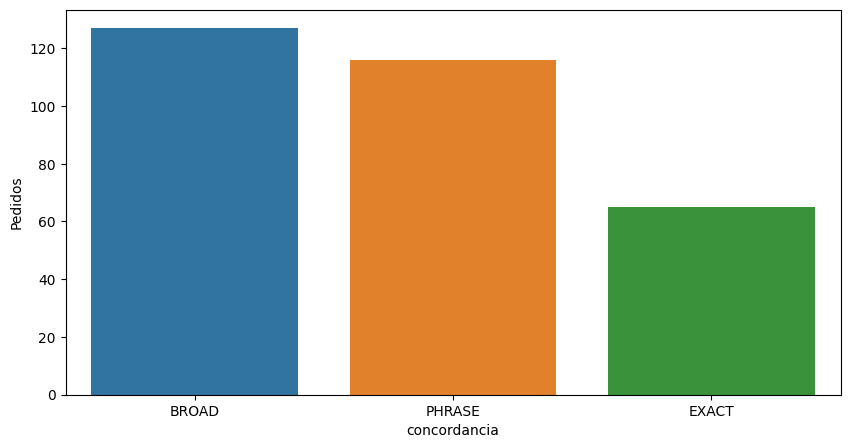

In [143]:
#¿Qué resultados ofrece cada tipo?

plt.figure(figsize=(10,5))
sns.barplot(x="concordancia", y="Pedidos", data=datos_con_ventas, estimator=sum,  errorbar=None)



<AxesSubplot:xlabel='Clics', ylabel='Pedidos'>

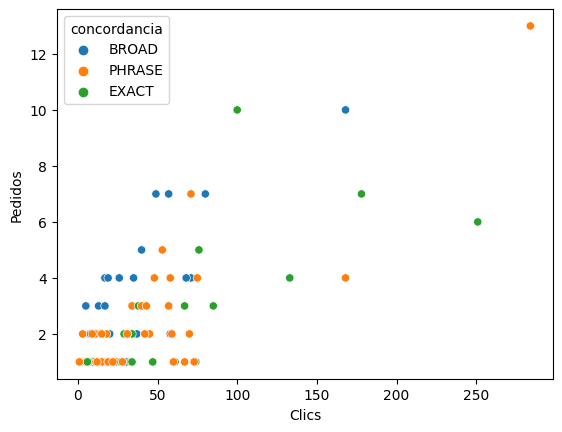

In [144]:
#Relación de Clicks e Impresiones según concordancia


sns.scatterplot(x="Clics", y="Pedidos", hue="concordancia", data=datos_con_ventas)


In [145]:
#RENTABILIDAD SEGÚN CONCORDANCIA

datos_vtas_amplia = datos_con_ventas.loc[datos_con_ventas["concordancia"] == "BROAD"]
datos_vtas_frase = datos_con_ventas.loc[datos_con_ventas["concordancia"] == "PHRASE"]
datos_vtas_exacta= datos_con_ventas.loc[datos_con_ventas["concordancia"] == "EXACT"]

Text(0, 0.5, 'gasto')

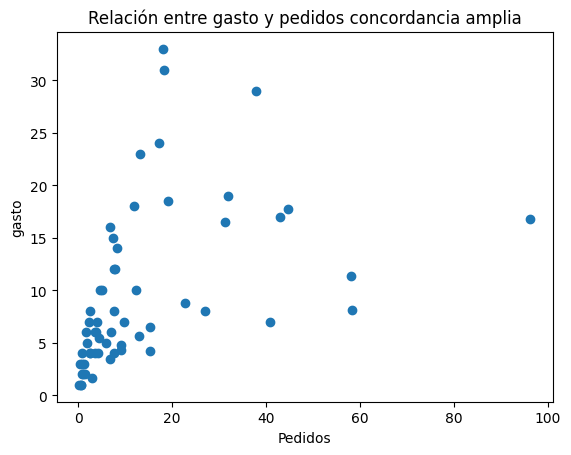

In [146]:
#RENTABILIDAD SEGÚN CONCORDANCIA 


plt.scatter(datos_vtas_amplia["gasto"], datos_vtas_amplia["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia amplia")
plt.xlabel("Pedidos")
plt.ylabel("gasto")


Text(0, 0.5, 'gasto')

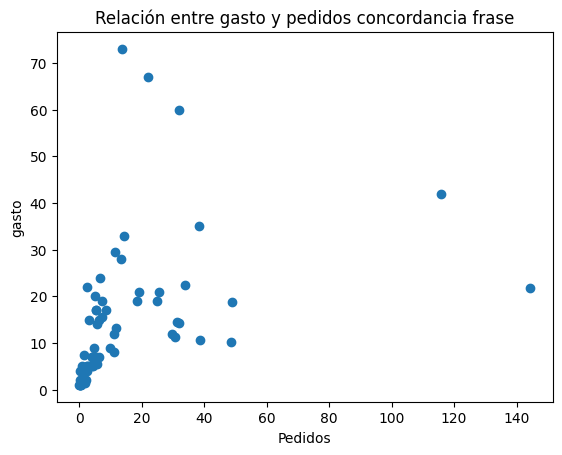

In [147]:
#RENTABILIDAD SEGÚN CONCORDANCIA FRASE


plt.scatter(datos_vtas_frase["gasto"], datos_vtas_frase["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia frase")
plt.xlabel("Pedidos")
plt.ylabel("gasto")

Text(0, 0.5, 'gasto')

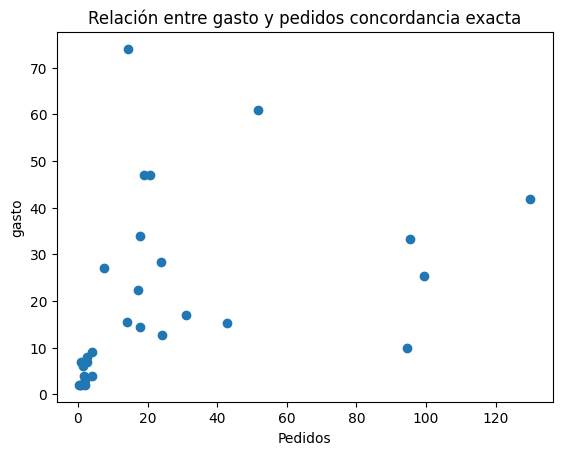

In [148]:
#RENTABILIDAD SEGÚN CONCORDANCIA EXACTA


plt.scatter(datos_vtas_exacta["gasto"], datos_vtas_exacta["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia exacta")
plt.xlabel("Pedidos")
plt.ylabel("gasto")

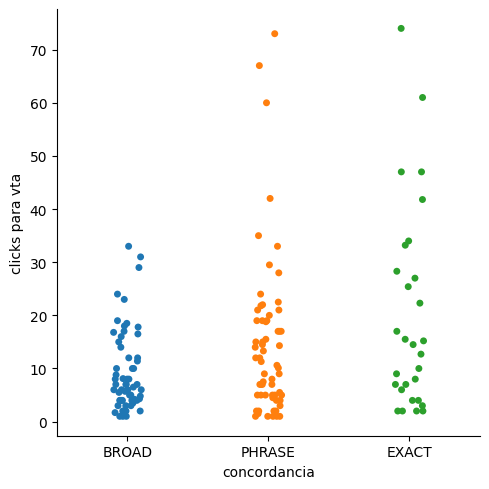

In [149]:
#clics para obtener una venta según concordancia
sns.catplot(x="concordancia", y="clicks para vta", hue="concordancia", data=datos_con_ventas);

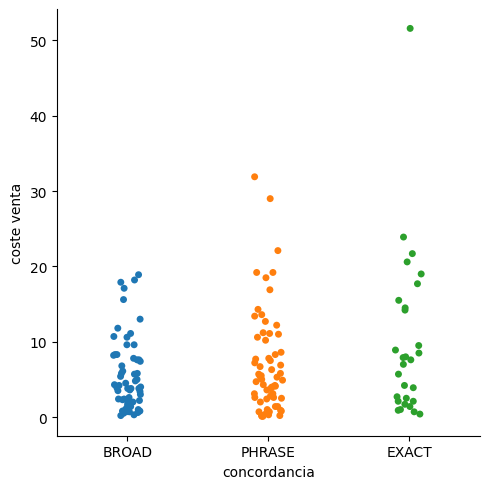

In [150]:
sns.catplot(x="concordancia", y="coste venta", hue="concordancia", data=datos_con_ventas);

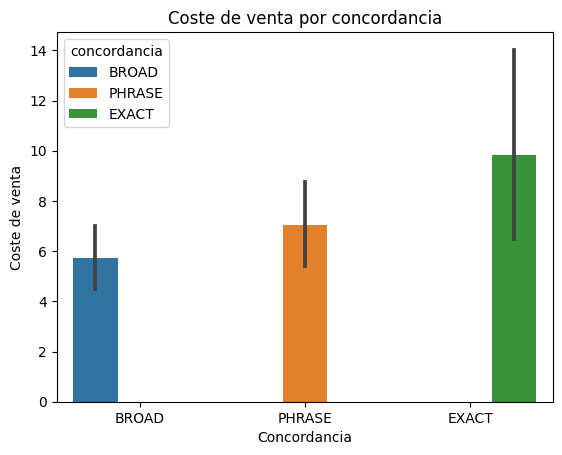

In [151]:


sns.barplot(x="concordancia", y="coste venta", hue="concordancia", data=datos_con_ventas)

plt.title("Coste de venta por concordancia")
plt.xlabel("Concordancia")
plt.ylabel("Coste de venta")

plt.show()


In [152]:
#H0 CONCORDANCIA BROAD ES MEJOR ALTERNATIVA RESPECTO A FRASE

import seaborn as sns 
from scipy.stats import ttest_ind



In [153]:
frase_test = datos_con_ventas.loc[datos_con_ventas.concordancia == "PHRASE", "Pedidos"]
broad_test = datos_con_ventas.loc[datos_con_ventas.concordancia == "EXACT", "Pedidos"]

In [154]:
alpha = 0.05 

In [155]:
# Calculo del estadístico y p-valor
stat, p = ttest_ind(frase_test, broad_test)
print(stat,p)

-0.901934570083097 0.3694990789526219


In [156]:
# Decisión en función del p-valor y el nivel de significación

if p < alpha:
    print("Rechazar la hipótesis nula:  (p-value: {:.4f})".format(p))
else:
    print("No se puede rechazar la hipótesis nula:  (p-value: {:.4f})".format(p))

No se puede rechazar la hipótesis nula:  (p-value: 0.3695)


In [158]:
- H0: no hay diferencia significativa entre los pedidos de Broad y frase

- H1: hay diferencia significativa entre entre los pedidos de Broad y frase

SyntaxError: invalid syntax (3329904025.py, line 1)

In [ ]:


frase_test_2 = datos_con_ventas[datos_con_ventas["concordancia"]=="PHRASE"]["Pedidos"]
broad_test_2 = datos_con_ventas[datos_con_ventas["concordancia"]=="BROAD"]["Pedidos"]

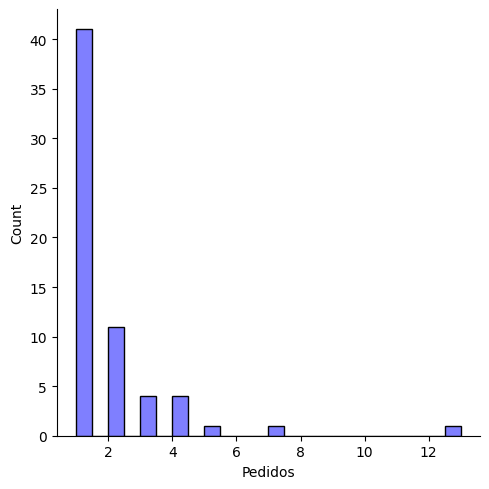

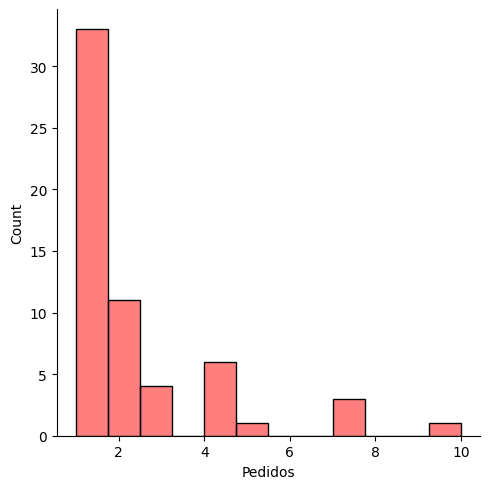

In [ ]:
sns.displot(frase_test_2, color='blue', alpha=0.5)
sns.displot(broad_test_2, color='red', alpha=0.5)

In [ ]:
from scipy.stats import mannwhitneyu

U, p_valor = mannwhitneyu(frase_test_2, broad_test_2)

print("Estadístico U: ", U)
print("P-valor: ", p_valor)

Estadístico U:  853.5
P-valor:  0.558973332075086


In [ ]:
# Seleccion del nivel de significancia
alpha = 0.05

# Decisión en función del p-valor y el nivel de significación
if p_valor < alpha:
    print("Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: {:.4f})".format(p_valor))
else:
    print("No se puede rechazar la hipótesis nula: las medianas de ambos grupos son iguales (p-value: {:.4f})".format(p_valor))

No se puede rechazar la hipótesis nula: las medianas de ambos grupos son iguales (p-value: 0.5590)


In [ ]:
#kw mas ineficientes

datos_sin_ventas = datos_raw[datos_raw["Pedidos"] == 0]
datos_ordenados = datos_sin_ventas.sort_values(by="gasto", ascending=False)
datos_ordenados

CAMPAIGN                   Palabra clave concordancia  Impresiones  \
484     BROAD                 libros fantasia        EXACT         4423   
529     BROAD              libros de fantasía        BROAD         4071   
717     BROAD                  libros 14 años        BROAD          999   
855     BROAD                   libro 18 años        BROAD         2083   
2419   Kindle              libros para kindle        BROAD        15613   
...       ...                             ...          ...          ...   
1303    FRASE        libros brandon sanderson       PHRASE            0   
1304    FRASE          libros baratos 12 años       PHRASE            0   
1305    FRASE  libros aventuras niños 12 años       PHRASE            0   
1306    FRASE  libros aventuras niños 10 años       PHRASE            0   
3429    PHASE                  10 años libros       PHRASE            2   

      Clics  gasto   CPC  Pedidos  clicks para vta  coste venta  
484      32  34.61  1.08        0              inf          inf  
529      33  29.08  0.88        0              inf          inf  
717      35  22.05  0.63        0              inf          inf  
855      38  20.82  0.55        0              inf          inf  
2419     61  20.43  0.33        0              inf          inf  
...     ...    ...   ...      ...              ...          ...  
1303      0   0.00  0.00        0              NaN          NaN  
1304      0   0.00  0.00        0              NaN          NaN  
1305      0   0.00  0.00        0              NaN          NaN  
1306      0   0.00  0.00        0              NaN          NaN  
3429      0   0.00  0.00        0              NaN          NaN  

[3279 rows x 10 columns]

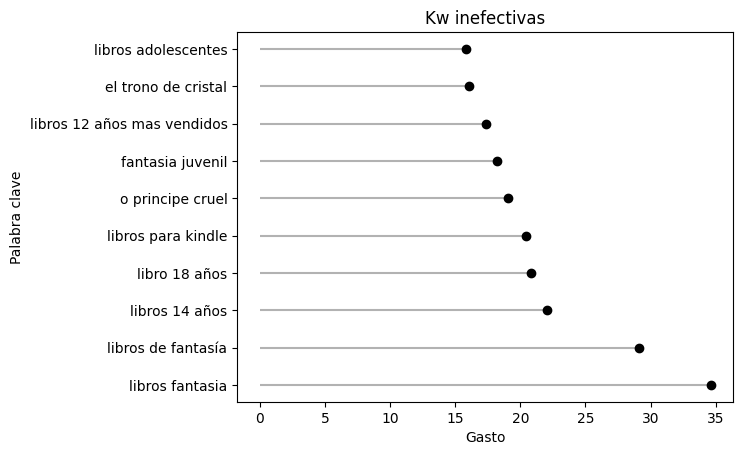

In [ ]:
import matplotlib.pyplot as plt

datos_ordenados = datos_sin_ventas.sort_values(by="gasto", ascending=False)

datos_top10 = datos_ordenados.head(10)

plt.hlines(y=datos_top10["Palabra clave"], xmin=0, xmax=datos_top10["gasto"], color='gray', alpha=0.6)
plt.plot(datos_top10["gasto"], datos_top10["Palabra clave"], "o", color='black')

plt.title("Kw inefectivas")
plt.xlabel("Gasto")
plt.ylabel("Palabra clave")

plt.show()

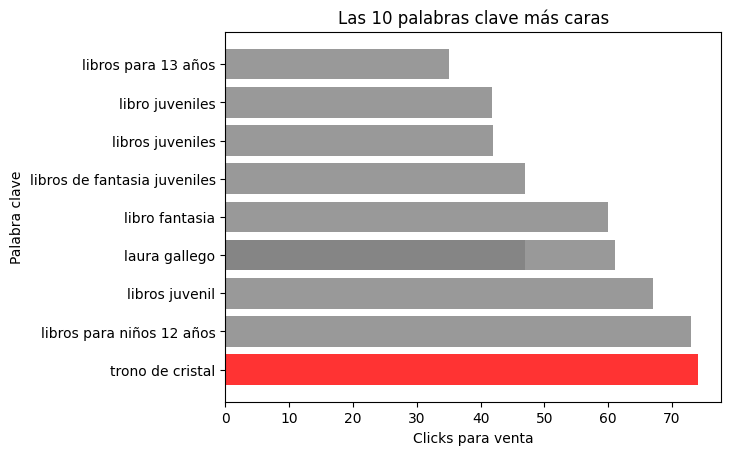

In [ ]:
#kw cuyo gasto para conseguir una venta sea demasiado elevado   

datos_ordenados = datos_con_ventas.sort_values(by="clicks para vta", ascending=False)

datos_top10 = datos_ordenados.head(10)

plt.barh(datos_top10["Palabra clave"], datos_top10["clicks para vta"], color=colores, alpha=0.8)


plt.title("Las 10 palabras clave más caras")
plt.xlabel("Clicks para venta")
plt.ylabel("Palabra clave")


plt.show()



In [ ]:
#kw cuyo gasto para conseguir una venta sea demasiado elevado  

datos_raw["ratio impresion click"]=round(datos_raw["Clics"]/datos_raw["Impresiones"],2)*100





CAMPAIGN          Palabra clave concordancia  Impresiones  Clics  gasto  \
0       BROAD       victoria alvarez        BROAD           98      0   0.00   
1       BROAD  trono de cristal saga        BROAD         1766      1   0.09   
2       BROAD       trono de cristal        BROAD            7      0   0.00   
3       BROAD   top libros juveniles        BROAD            5      0   0.00   
4       BROAD    tolkien aniversario        EXACT            0      0   0.00   
...       ...                    ...          ...          ...    ...    ...   
3425    PHASE   archivo de tormentas       PHRASE         1713      2   0.96   
3426    PHASE          amazon libros       PHRASE          449      0   0.00   
3427    PHASE         14 años libros       PHRASE          256      0   0.00   
3428    PHASE                12 años       PHRASE          990      5   3.92   
3429    PHASE         10 años libros       PHRASE            2      0   0.00   

       CPC  Pedidos  clicks para vta  coste venta  ratio impresion click  
0     0.00        0              NaN          NaN                    0.0  
1     0.09        0              inf          inf                    0.0  
2     0.00        0              NaN          NaN                    0.0  
3     0.00        0              NaN          NaN                    0.0  
4     0.00        0              NaN          NaN                    NaN  
...    ...      ...              ...          ...                    ...  
3425  0.48        0              inf          inf                    0.0  
3426  0.00        0              NaN          NaN                    0.0  
3427  0.00        0              NaN          NaN                    0.0  
3428  0.78        0              inf          inf                    1.0  
3429  0.00        0              NaN          NaN                    0.0  

[3430 rows x 11 columns]

In [ ]:

con_impresiones=(datos_raw["Impresiones"]>100)
#con_impresiones_low= con_impresiones.sort_values(by="ratio impresion click", ascending=False)
#dato



#datos_ordenados = datos_con_ventas.sort_values(by="clicks para vta", ascending=False)




In [ ]:
ordenado_impresiones=datos_raw.loc[con_impresiones].sort_values(by="Impresiones", ascending=False)
ordenado_impresiones

CAMPAIGN                  Palabra clave concordancia  Impresiones  Clics  \
23      BROAD               o principe cruel        BROAD       111703    105   
2566    PHASE               trono de cristal        EXACT        91182     74   
3408    PHASE            el trono de cristal       PHRASE        85111     83   
1507    FRASE            el trono de cristal       PHRASE        81935     59   
1195    FRASE                 libros juvenil       PHRASE        64034     67   
...       ...                            ...          ...          ...    ...   
2648    PHASE      novelas juveniles 12 años       PHRASE          102      1   
2361   Kindle  libros para 13 años de chicas        BROAD          102      0   
1684   Kindle         libros juvenil 12 años       PHRASE          101      5   
2633    PHASE             novelas medievales       PHRASE          101      0   
3016    PHASE                 libros fantasy       PHRASE          101      1   

      gasto   CPC  Pedidos  clicks para vta  coste venta  \
23    19.05  0.18        0              inf          inf   
2566  14.50  0.20        1             74.0         14.5   
3408  16.04  0.19        0              inf          inf   
1507  11.53  0.20        2             29.5          5.8   
1195  22.07  0.33        1             67.0         22.1   
...     ...   ...      ...              ...          ...   
2648   1.18  1.18        0              inf          inf   
2361   0.00  0.00        0              NaN          NaN   
1684   2.51  0.50        1              5.0          2.5   
2633   0.00  0.00        0              NaN          NaN   
3016   0.42  0.42        0              inf          inf   

      ratio impresion click  
23                      0.0  
2566                    0.0  
3408                    0.0  
1507                    0.0  
1195                    0.0  
...                     ...  
2648                    1.0  
2361                    0.0  
1684                    5.0  
2633                    0.0  
3016                    1.0  

[778 rows x 11 columns]

In [ ]:
#ventas con mayor coste 


ventas_coste_alto= datos_con_ventas.sort_values(by="coste venta", ascending=False)
ventas_coste_alto.head(10)

CAMPAIGN                 Palabra clave concordancia  Impresiones  Clics  \
885     BROAD                 laura gallego        EXACT         8429     61   
3296    PHASE                libro fantasia       PHRASE         1890     60   
2981    PHASE              libros juveniles       PHRASE        56084    168   
569     BROAD        libros de adolescentes        EXACT         9369    133   
1195    FRASE                libros juvenil       PHRASE        64034     67   
774     BROAD               libro juveniles        EXACT        40044    251   
3377    PHASE                 laura gallego        EXACT        16433     47   
837     BROAD            libro adolescentes       PHRASE         3024     21   
288     BROAD           libros para 13 años       PHRASE         2458     70   
537     BROAD  libros de fantasia juveniles        EXACT         3256     47   

       gasto   CPC  Pedidos  clicks para vta  coste venta  
885    51.62  0.85        1             61.0         51.6  
3296   31.93  0.53        1             60.0         31.9  
2981  115.86  0.69        4             42.0         29.0  
569    95.43  0.72        4             33.2         23.9  
1195   22.07  0.33        1             67.0         22.1  
774   129.97  0.52        6             41.8         21.7  
3377   20.58  0.44        1             47.0         20.6  
837    19.19  0.91        1             21.0         19.2  
288    38.44  0.55        2             35.0         19.2  
537    18.96  0.40        1             47.0         19.0

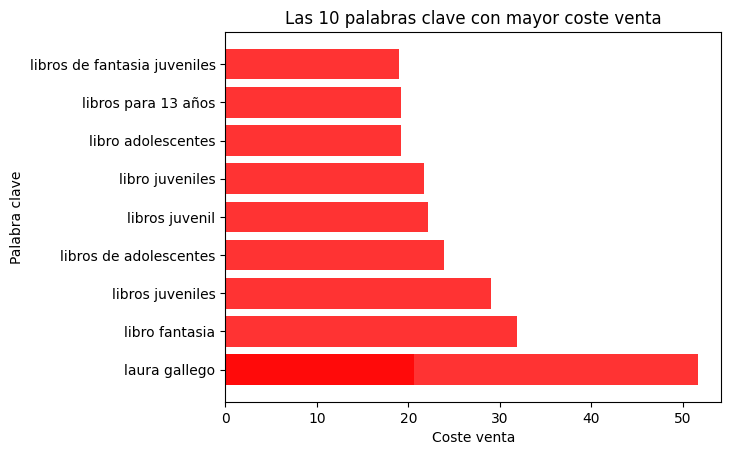

In [ ]:
import matplotlib.pyplot as plt


ventas_coste_alto = datos_con_ventas.sort_values(by="coste venta", ascending=False)


ventas_coste_alto_top10 = ventas_coste_alto.head(10)


plt.barh(ventas_coste_alto_top10["Palabra clave"], ventas_coste_alto_top10["coste venta"], color="red", alpha=0.8)

plt.title("Las 10 palabras clave con mayor coste venta")
plt.xlabel("Coste venta")
plt.ylabel("Palabra clave")


plt.show()


In [ ]:
#mayor cpc

rdos=datos_con_ventas.sort_values(by="Pedidos", ascending=False)
rdos.head(25)



CAMPAIGN                        Palabra clave concordancia  Impresiones  \
436     BROAD                       libros juvenil       PHRASE        52771   
838     BROAD                   libro adolescentes        EXACT         7321   
274     BROAD             libros para adolescentes        BROAD        18477   
1319    FRASE                  libros adolescentes       PHRASE        23846   
647     BROAD          libros adolescentes 14 años        BROAD         3930   
308     BROAD    libros niños 12 años mas vendidos        BROAD         3577   
268     BROAD  libros para adolescentes de 13 años        BROAD         2982   
434     BROAD                     libros juveniles        EXACT        59705   
774     BROAD                      libro juveniles        EXACT        40044   
285     BROAD                  libros para 14 años       PHRASE         1592   
863     BROAD                        libro 15 años        BROAD         2074   
654     BROAD                  libros adolescentes        EXACT         9018   
420     BROAD             libros juveniles 14 años        BROAD         4880   
2981    PHASE                     libros juveniles       PHRASE        56084   
773     BROAD                      libro juveniles        BROAD        11465   
569     BROAD               libros de adolescentes        EXACT         9369   
263     BROAD  libros para adolescentes de 16 años       PHRASE         2859   
857     BROAD                        libro 17 años        BROAD          744   
211     BROAD         libros para niños de 14 años        BROAD          690   
865     BROAD            libro 14 años mas vendido        BROAD         1031   
1080    FRASE                   libros para kindle       PHRASE        14989   
868     BROAD            libro 13 años mas vendido        BROAD         1080   
427     BROAD             libros juveniles 12 años       PHRASE         3420   
2765    PHASE         libros para niños de 12 años        EXACT        19616   
802     BROAD                         libro espada        BROAD         1113   

      Clics   gasto   CPC  Pedidos  clicks para vta  coste venta  
436     284  144.41  0.51       13             21.8         11.1  
838     100   94.67  0.95       10             10.0          9.5  
274     168   96.23  0.57       10             16.8          9.6  
1319     71   48.60  0.68        7             10.1          6.9  
647      80   58.02  0.73        7             11.4          8.3  
308      49   40.83  0.83        7              7.0          5.8  
268      57   58.23  1.02        7              8.1          8.3  
434     178   99.28  0.56        7             25.4         14.2  
774     251  129.97  0.52        6             41.8         21.7  
285      53   38.55  0.73        5             10.6          7.7  
863      40   26.89  0.67        5              8.0          5.4  
654      76   42.74  0.56        5             15.2          8.5  
420      71   44.54  0.63        4             17.8         11.1  
2981    168  115.86  0.69        4             42.0         29.0  
773      68   42.87  0.63        4             17.0         10.7  
569     133   95.43  0.72        4             33.2         23.9  
263      58   31.16  0.54        4             14.5          7.8  
857      19    9.01  0.47        4              4.8          2.3  
211      17   15.37  0.90        4              4.2          3.8  
865      26   15.21  0.59        4              6.5          3.8  
1080     75   48.79  0.65        4             18.8         12.2  
868      35   22.66  0.65        4              8.8          5.7  
427      48   29.81  0.62        4             12.0          7.5  
2765     85   23.82  0.28        3             28.3          7.9  
802       5    2.84  0.57        3              1.7          0.9

In [ ]:
datos_raw.size

37730

In [ ]:
import numpy as np
import scipy.stats as stats
import seaborn as sns


#x = penguins['bill_length_mm'].dropna()

In [ ]:
#correlacion spearman
datos_con_ventas.corr(method="spearman")

Impresiones     Clics     gasto       CPC   Pedidos  \
Impresiones               1.000000  0.762149  0.626726 -0.064953  0.405168   
Clics                     0.762149  1.000000  0.934414  0.143529  0.642582   
gasto                     0.626726  0.934414  1.000000  0.453798  0.656525   
CPC                      -0.064953  0.143529  0.453798  1.000000  0.271127   
Pedidos                   0.405168  0.642582  0.656525  0.271127  1.000000   
clicks para vta           0.723582  0.875645  0.782819  0.005618  0.225179   
coste venta               0.584054  0.839365  0.903561  0.402040  0.296281   
ratio impresion click    -0.736932 -0.210238 -0.091406  0.182004 -0.020051   

                       clicks para vta  coste venta  ratio impresion click  
Impresiones                   0.723582     0.584054              -0.736932  
Clics                         0.875645     0.839365              -0.210238  
gasto                         0.782819     0.903561              -0.091406  
CPC                           0.005618     0.402040               0.182004  
Pedidos                       0.225179     0.296281              -0.020051  
clicks para vta               1.000000     0.892685              -0.261352  
coste venta                   0.892685     1.000000              -0.116700  
ratio impresion click        -0.261352    -0.116700               1.000000

In [ ]:
datos_concordancia.corr(method="spearman")

Pedidos       CPC  clicks para vta  coste venta  \
Pedidos          1.000000  0.866025        -1.000000    -1.000000   
CPC              0.866025  1.000000        -0.866025    -0.866025   
clicks para vta -1.000000 -0.866025         1.000000     1.000000   
coste venta     -1.000000 -0.866025         1.000000     1.000000   
Impresiones     -0.500000 -0.866025         0.500000     0.500000   
Clics           -0.500000 -0.866025         0.500000     0.500000   

                 Impresiones     Clics  
Pedidos            -0.500000 -0.500000  
CPC                -0.866025 -0.866025  
clicks para vta     0.500000  0.500000  
coste venta         0.500000  0.500000  
Impresiones         1.000000  1.000000  
Clics               1.000000  1.000000

In [ ]:
from scipy import stats
from scipy import interpolate

In [ ]:
#correlacion gasto con pedidos
feature_name = 'gasto'
target_column = 'Pedidos'

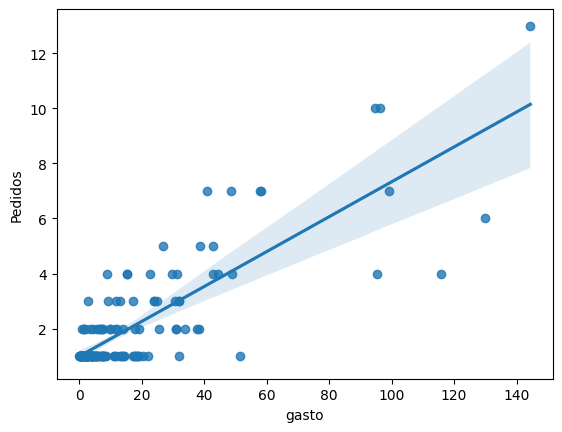

In [ ]:
_= sns.regplot(data = datos_con_ventas , x = feature_name,  y = target_column)

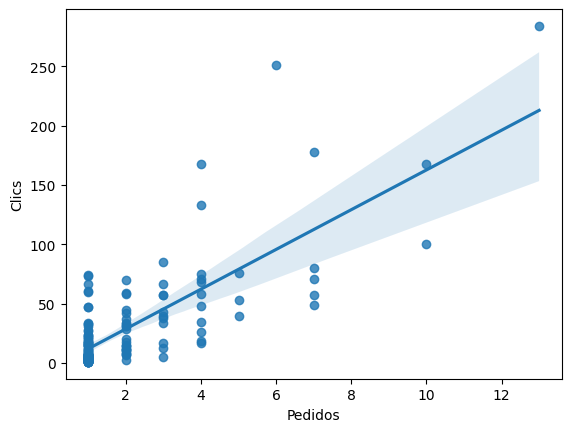

In [ ]:
_= sns.regplot(data = datos_con_ventas , x = target_column ,  y = feature_name)

In [ ]:
#correlacion clics con pedidos
feature_name = 'Clics'
target_column = 'Pedidos'

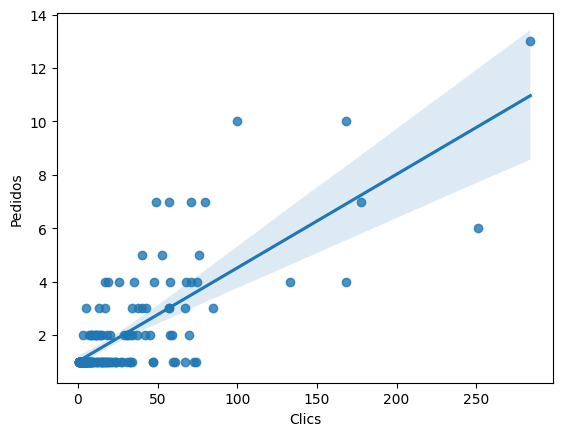

In [ ]:
_= sns.regplot(data = datos_con_ventas , x = feature_name,  y = target_column)

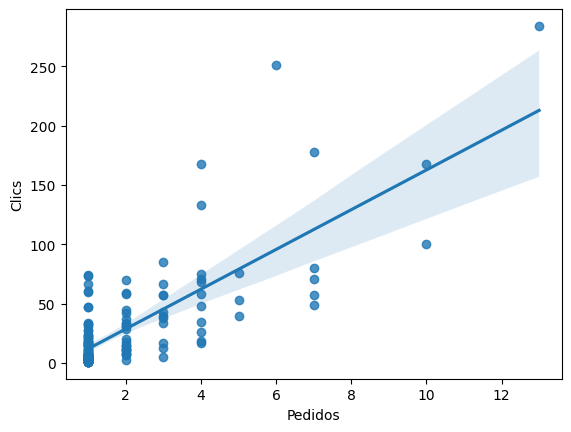

In [ ]:
_= sns.regplot(data = datos_con_ventas , x =target_column ,  y = feature_name)

In [ ]:
#cuadrante media y comparar que tengan pedidos si 

In [ ]:
from scipy import stats
import statsmodels.api as sm

In [ ]:
from statsmodels.formula.api import ols

In [163]:
#Predecir pedidos según clics

formula = 'Pedidos ~ Clics'
lm = ols(formula, datos_raw).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Pedidos   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     5664.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:09:14   Log-Likelihood:                -1341.2
No. Observations:                3430   AIC:                             2686.
Df Residuals:                    3428   BIC:                             2699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0052      0.006      0.835      0.4

In [164]:
#Predecir pedidos según gasto

formula = 'Pedidos ~ gasto'
lm = ols(formula, datos_raw).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Pedidos   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     8251.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:10:08   Log-Likelihood:                -911.76
No. Observations:                3430   AIC:                             1828.
Df Residuals:                    3428   BIC:                             1840.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0111      0.005      2.032      0.0

In [166]:
#regresion multiple

formula = 'Pedidos ~ gasto + Clics '
lm = ols(formula, datos_raw).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Pedidos   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     4137.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:11:01   Log-Likelihood:                -907.94
No. Observations:                3430   AIC:                             1822.
Df Residuals:                    3427   BIC:                             1840.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0126      0.005      2.295      0.0

In [ ]:
#KEYWORDS

In [ ]:
#Media CPC
datos_con_ventas[["CPC", "Clics", "coste venta", "Pedidos", "clicks para vta"]].mean()


CPC                 0.540728
Clics              29.450331
coste venta         7.060265
Pedidos             2.039735
clicks para vta    13.696689
dtype: float64

In [ ]:
datos_con_ventas["% imp clic"]=datos_con_ventas["Clics"]/datos_con_ventas["Impresiones"]

c:\Users\Abraham\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#agrupo kw por palabra clave 

kw_exitosas=datos_con_ventas.groupby("Palabra clave").agg({"Pedidos": "sum", "CPC": "mean", "clicks para vta":"mean", "coste venta":"mean", "Impresiones":"sum","Clics":"sum", "% imp clic":"mean"})
kw_exitosas





TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
CPC                 0.540728
Clics              29.450331
coste venta         7.060265
Pedidos             2.039735
clicks para vta    13.696689
dtype: float64

In [ ]:
kw_exitosas.query('Pedidos > 2 and `coste venta` < 7.06 and `clicks para vta` < 13.69 and CPC < 0.55')


Pedidos    CPC  clicks para vta  coste venta  \
Palabra clave                                                              
la erupcion zafiro                3  0.080             5.00         0.45   
las puertas de piedra             3  0.180            12.25         2.75   
libro 17 años                     4  0.470             4.80         2.30   
libros 16 años                    4  0.465             2.65         1.60   
libros de fantasia adultos        4  0.515             6.50         3.30   
libros juveniles 12 años          6  0.490            12.00         5.90   
libros kindle                     4  0.540            11.50         5.45   

                            Impresiones  Clics  % imp clic  
Palabra clave                                               
la erupcion zafiro                  154     16    0.241667  
las puertas de piedra             19295     29    0.001495  
libro 17 años                       744     19    0.025538  
libros 16 años                      520     14    0.137597  
libros de fantasia adultos         1187     26    0.022445  
libros juveniles 12 años           5916     72    0.015603  
libros kindle                     12444     61    0.004213

In [ ]:
#sin agrupar por palabra clave y teniendo en cuenta concordancia
datos_con_ventas.query('Pedidos > 1 and `coste venta` < 8 and `clicks para vta` < 15 and CPC < 0.65')


CAMPAIGN                        Palabra clave concordancia  Impresiones  \
263     BROAD  libros para adolescentes de 16 años       PHRASE         2859   
353     BROAD       libros mas vendidos de 12 años        BROAD          473   
423     BROAD             libros juveniles 13 años        BROAD         1128   
427     BROAD             libros juveniles 12 años       PHRASE         3420   
541     BROAD           libros de fantasia adultos        BROAD          666   
802     BROAD                         libro espada        BROAD         1113   
857     BROAD                        libro 17 años        BROAD          744   
860     BROAD            libro 15 años mas vendido        BROAD          331   
865     BROAD            libro 14 años mas vendido        BROAD         1031   
893     BROAD                   la erupcion zafiro        BROAD          144   
1267    FRASE           libros de fantasia adultos       PHRASE          521   
1275    FRASE     libros de aventuras para adultos       PHRASE          128   
1434    FRASE                        laura gallego       PHRASE        21031   
2725    PHASE                   literatura juvenil       PHRASE         1353   
2972    PHASE             libros juveniles 13 años       PHRASE          638   
3159    PHASE                  libros adolescentes       PHRASE        11318   
3379    PHASE                las puertas de piedra       PHRASE         6105   

      Clics  gasto   CPC  Pedidos  clicks para vta  coste venta  \
263      58  31.16  0.54        4             14.5          7.8   
353      11   4.42  0.40        2              5.5          2.2   
423      20  12.25  0.61        2             10.0          6.1   
427      48  29.81  0.62        4             12.0          7.5   
541      12   6.94  0.58        2              6.0          3.5   
802       5   2.84  0.57        3              1.7          0.9   
857      19   9.01  0.47        4              4.8          2.3   
860       8   3.49  0.44        2              4.0          1.7   
865      26  15.21  0.59        4              6.5          3.8   
893      12   1.56  0.13        2              6.0          0.8   
1267     14   6.26  0.45        2              7.0          3.1   
1275      3   1.87  0.62        2              1.5          0.9   
1434     40  11.69  0.29        3             13.3          3.9   
2725     18   9.88  0.55        2              9.0          4.9   
2972     11   5.63  0.51        2              5.5          2.8   
3159     15   1.39  0.09        2              7.5          0.7   
3379      9   1.03  0.11        2              4.5          0.5   

      ratio imp clic  % imp clic  
263        49.293103    0.020287  
353        43.000000    0.023256  
423        56.400000    0.017730  
427        71.250000    0.014035  
541        55.500000    0.018018  
802       222.600000    0.004492  
857        39.157895    0.025538  
860        41.375000    0.024169  
865        39.653846    0.025218  
893        12.000000    0.083333  
1267       37.214286    0.026871  
1275       42.666667    0.023438  
1434      525.775000    0.001902  
2725       75.166667    0.013304  
2972       58.000000    0.017241  
3159      754.533333    0.001325  
3379      678.333333    0.001474

In [ ]:
#Ordeno kw en funcion de mayor número de ventas

kw_exitosas=kw_exitosas.sort_values(by="coste venta", ascending=True)
kw_exitosas.head(25)

Pedidos    CPC  clicks para vta  \
Palabra clave                                                       
laura gallego finis mundi               1  0.230             1.00   
libro fantasia 18 años                  1  0.250             1.00   
libro fantasia 12 años                  1  0.250             1.00   
libros de niños de 10 años              1  0.110             3.00   
libros niños 10 años                    1  0.140             2.00   
la erupcion zafiro                      3  0.080             5.00   
libros de lectura para 12 años          1  0.510             1.00   
libros para niños 18 años               1  0.610             1.00   
libros 11 años niño                     1  0.670             1.00   
libros 11 años aventuras                1  0.240             3.00   
libros 10-12 años                       1  0.360             2.00   
trono de cristal saga                   1  0.340             2.00   
libros juveniles 15 años                1  0.420             2.00   
libros mas vendidos adolescentes        1  0.190             4.00   
libro espada                            3  0.570             1.70   
saga trono de cristal                   1  0.130             7.00   
libros de aventuras para adultos        2  0.620             1.50   
novelas juveniles                       1  0.480             2.00   
libros adolescentes 14 anos             1  0.210             5.00   
libros 18 años mas vendidos             1  0.480             2.00   
libros 22 años                          1  0.390             3.00   
novela juvenil 16 años                  1  0.690             2.00   
harry potter libro                      1  0.230             6.00   
juegos del hambre libro                 1  0.700             2.00   
libros 16 años                          4  0.465             2.65   

                                  coste venta  Impresiones  Clics  
Palabra clave                                                      
laura gallego finis mundi                0.20          131      1  
libro fantasia 18 años                   0.20            7      1  
libro fantasia 12 años                   0.20           11      1  
libros de niños de 10 años               0.30          346      3  
libros niños 10 años                     0.30          184      2  
la erupcion zafiro                       0.45          154     16  
libros de lectura para 12 años           0.50           51      1  
libros para niños 18 años                0.60            9      1  
libros 11 años niño                      0.70            1      1  
libros 11 años aventuras                 0.70           13      3  
libros 10-12 años                        0.70           33      2  
trono de cristal saga                    0.70         1153      2  
libros juveniles 15 años                 0.80          160      2  
libros mas vendidos adolescentes         0.80         1254      4  
libro espada                             0.90         1113      5  
saga trono de cristal                    0.90        11709      7  
libros de aventuras para adultos         0.90          128      3  
novelas juveniles                        1.00         1123      2  
libros adolescentes 14 anos              1.00         2610      5  
libros 18 años mas vendidos              1.00           12      2  
libros 22 años                           1.20           50      3  
novela juvenil 16 años                   1.40           22      2  
harry potter libro                       1.40         8682      6  
juegos del hambre libro                  1.40         2306      2  
libros 16 años                           1.60          520     14

0.540728476821192